# Loading Data

In [2]:
data <- read.csv("all.csv")
nrow(data)
str(data)

[1] 2459

'data.frame':	2459 obs. of  11 variables:
 $ X              : int  1 2 3 4 5 7 8 10 11 12 ...
 $ no_authors     : int  3 7 4 3 5 2 1 4 4 1 ...
 $ article_age    : int  3 3 3 3 3 3 3 3 3 3 ...
 $ page.count     : int  21 11 11 11 11 8 13 11 13 12 ...
 $ no_references  : int  118 43 52 112 57 50 74 35 55 53 ...
 $ abstract_length: int  177 378 242 161 149 165 132 176 196 150 ...
 $ title_length   : int  10 15 16 13 12 15 9 17 9 11 ...
 $ abstract_ratio : num  0.0621 0.0688 0.0165 0 0.0403 ...
 $ numkeys        : int  5 5 5 3 5 5 5 3 5 5 ...
 $ source.title   : Factor w/ 2 levels "asia pacific education review",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ cited.by       : int  16 8 9 7 3 2 17 2 4 5 ...


# Transforming Variables

In [3]:
na_index <- which(is.na(data$cited.by))
na_index
data[na_index, "cited.by"] <- 0

data$cited.by_cat <- cut(data$cited.by,
                        breaks = quantile (data$cited.by, c (0, 0.5, 1)),
                        labels=c("cited_1st","cited_2nd") ,include.lowest = TRUE )

data$cited_peryear     <- data$cited.by / data$article_age


data$cited_peryear_cat <- 0

for (row in 1:nrow(data))
    {if (data[row,"cited_peryear"] <= 2) data[row,"cited_peryear_cat"] <-0 
     else data[row,"cited_peryear_cat"] <-1}
         
data$cited_peryear_cat <- as.factor(data$cited_peryear_cat)
          
class(data$cited_peryear_cat)
summary(data$cited_peryear_cat)
    
head(data[,c("cited.by","article_age","cited_peryear","cited_peryear_cat")],n=5)

# summary(data$cited_peryear)

# summary(data$cited.by)
# summary(data$cited.by_cat)


integer(0)

[1] "factor"

0    1 
1221 1238

,cited.by,article_age,cited_peryear,cited_peryear_cat
1,16,3,5.333333,1
2,8,3,2.666667,1
3,9,3,3,1
4,7,3,2.333333,1
5,3,3,1,0


In [4]:
str(data)

'data.frame':	2459 obs. of  14 variables:
 $ X                : int  1 2 3 4 5 7 8 10 11 12 ...
 $ no_authors       : int  3 7 4 3 5 2 1 4 4 1 ...
 $ article_age      : int  3 3 3 3 3 3 3 3 3 3 ...
 $ page.count       : int  21 11 11 11 11 8 13 11 13 12 ...
 $ no_references    : int  118 43 52 112 57 50 74 35 55 53 ...
 $ abstract_length  : int  177 378 242 161 149 165 132 176 196 150 ...
 $ title_length     : int  10 15 16 13 12 15 9 17 9 11 ...
 $ abstract_ratio   : num  0.0621 0.0688 0.0165 0 0.0403 ...
 $ numkeys          : int  5 5 5 3 5 5 5 3 5 5 ...
 $ source.title     : Factor w/ 2 levels "asia pacific education review",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ cited.by         : num  16 8 9 7 3 2 17 2 4 5 ...
 $ cited.by_cat     : Factor w/ 2 levels "cited_1st","cited_2nd": 2 1 1 1 1 1 2 1 1 1 ...
 $ cited_peryear    : num  5.33 2.67 3 2.33 1 ...
 $ cited_peryear_cat: Factor w/ 2 levels "0","1": 2 2 2 2 1 1 2 1 1 1 ...


In [5]:
summary(data$no_authors)
data$no_authors_cat <- cut(data$no_authors,
                        breaks = quantile (data$no_authors, c (0, 0.5, 1)),
                        labels=c("no_authors_1st","no_authors_2nd") ,include.lowest = TRUE )
summary(data$no_authors_cat)
# data[,c("no_authors","no_authors_cat")]

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.708   4.000  12.000 

no_authors_1st no_authors_2nd 
          1279           1180

In [6]:
summary(data$numkeys)
data$numkeys_cat <- cut(data$numkeys,
                        breaks = quantile (data$numkeys, c (0, 0.5, 1)),
                        labels=c("numkeys_1st","numkeys_2nd") ,include.lowest = TRUE )
summary(data$numkeys_cat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   4.000   4.414   5.000  14.000 

numkeys_1st numkeys_2nd 
       1279        1180

# Contingency Table

In [6]:
#table(data$cited.by_cat,data$no_authors_cat,data$numkeys_cat)
# cat_var <- c("cited.by_cat","no_authors_cat","numkeys_cat", "source.title" )

# print ('Table1')
# summary(data[,cat_var])
# ftable(data[,cat_var], row.vars=c("no_authors_cat","numkeys_cat","source.title"), col.vars="cited.by_cat")

# print ('Table2')
# summary(data[,cat_var])
# ftable(data[,cat_var], row.vars=c("no_authors_cat","numkeys_cat","source.title"), col.vars="cited.by_cat")

# print ('Table3')
# summary(data[,cat_var])
# ftable(data[,cat_var], row.vars=c("no_authors_cat","numkeys_cat","source.title"), col.vars="cited.by_cat")

# print ('Table4')
# summary(data[,cat_var])
# ftable(data[,cat_var], row.vars=c("numkeys_cat","source.title"), col.vars="cited.by_cat")

# print ('Table5')
# summary(data[,cat_var])
# ftable(data[,cat_var], row.vars=c("no_authors_cat","source.title"), col.vars="cited.by_cat")

In [17]:
cited.by.table <- table(data$cited.by)
# cited.by.table
# round(prop.table(cited.by.table),2) # row percentages 
rbind(cited.by.table,round(prop.table(cited.by.table),2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,100,101,102,103,104,106,107,108,110,111,112,113,115,116,117,118,119,120,122,124,125,126,127,128,129,130,132,133,136,137,138,139,142,145,146,148,149,150,151,152,154,155,157,159,163,165,166,169,174,179,181,183,188,194,198,204,205,208,213,215,216,218,220,221,226,228,230,234,242,243,250,254,264,267,268,269,273,300,313,376,403,502
cited.by.table,161,175,149,125,117,77,95,74,71,53,58,53,56,50,49,48,63,46,35,36,40,33,31,40,30,33,18,17,17,30,27,17,18,16,13,11,28,18,14,10,9,11,10,9,14,9,7,9,6,10,8,10,7,9,5,8,8,8,6,7,11,3,8,3,2,5,5,7,4,2,5,4,1,5,2,5,6,2,4,4,4,2,4,3,3,1,3,2,2,1,1,2,2,2,1,1,1,1,2,1,2,2,1,2,3,1,1,1,1,3,2,2,2,2,1,1,1,1,1,2,1,3,1,5,2,1,3,2,1,1,2,1,3,2,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
,0.07,0.07,0.06,0.05,0.05,0.03,0.04,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.03,0.02,0.01,0.01,0.02,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Creating New Target Variables

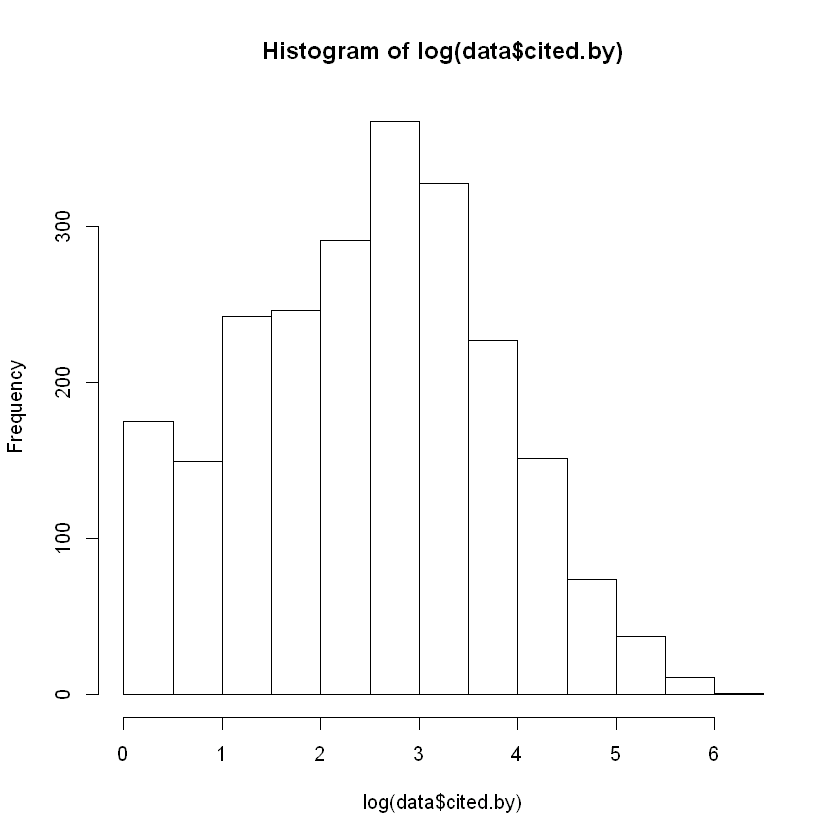

In [18]:
data$cited.by_zero <- 0


for (row in 1:nrow(data))
    {if (data[row,"cited.by"] == 0 ) data[row,"cited.by_zero"] <- data[row,"cited.by"] + 0.5
    else data[row,"cited.by_zero"] <- data[row,"cited.by"] }
     
#hist(log(data$cited.by_zero))
    
    
    
data$cited_peryear_zero <- 0


for (row in 1:nrow(data))
    {if (data[row,"cited_peryear"] == 0 ) data[row,"cited_peryear_zero"] = data[row,"cited_peryear"] + 0.5
    else data[row,"cited_peryear_zero"] = data[row,"cited_peryear"] }
     
hist(log(data$cited.by))
#barplot(data$cited_peryear_zero)

    

In [9]:
class(data$cited_peryear )
summary(data$cited_peryear)

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.9115  2.1250  3.8420  4.7500 62.7500 

# Model1 - predicting cited.by

In [23]:
length(which(data$cited.by_zero >0))

pred_numeric <- c("abstract_length" ,"page.count","title_length", "abstract_ratio" ,"no_references","no_authors"
                  ,"numkeys", "cited.by_zero", "article_age")
pred_cat     <- c("source.title")

pred_data     <- data[,c(pred_numeric,pred_cat)]
pred_data0    <- data[which(data$cited.by_zero > 0.5 ),c(pred_numeric,pred_cat)]
pred_data000    <- data[which(data$cited.by_zero ),c(pred_numeric,pred_cat))]


linear_reg   <- lm(log(cited.by_zero) ~ ., data=pred_data)
linear_reg0  <- lm(log(cited.by_zero) ~ ., data=pred_data0)
linear_reg00  <- lm(cited.by_zero ~ . , data=pred_data)
linear_reg000 <- lm(cited.by_zero ~ . , data=pred_data000)


summary(linear_reg)
summary(linear_reg0)

ERROR: Error in parse(text = x, srcfile = src): <text>:9:76: unexpected ')'
8: pred_data0    <- data[which(data$cited.by_zero > 0.5 ),c(pred_numeric,pred_cat)]
9: pred_data000    <- data[which(data$cited.by_zero ),c(pred_numeric,pred_cat))
                                                                              ^


In [9]:
linear_reg_step <- step(linear_reg)
linear_reg_step

Start:  AIC=417.21
log(cited.by_zero) ~ abstract_length + page.count + title_length + 
    abstract_ratio + no_references + no_authors + numkeys + article_age + 
    source.title

                  Df Sum of Sq    RSS    AIC
- numkeys          1      0.00 2890.1 415.21
- abstract_length  1      0.30 2890.4 415.47
- title_length     1      0.71 2890.8 415.82
- no_authors       1      1.48 2891.6 416.47
<none>                         2890.1 417.21
- abstract_ratio   1      3.25 2893.3 417.98
- page.count       1      5.45 2895.5 419.85
- no_references    1     47.46 2937.6 455.27
- source.title     1    479.83 3369.9 792.92
- article_age      1    634.77 3524.9 903.46

Step:  AIC=415.21
log(cited.by_zero) ~ abstract_length + page.count + title_length + 
    abstract_ratio + no_references + no_authors + article_age + 
    source.title

                  Df Sum of Sq    RSS    AIC
- abstract_length  1      0.30 2890.4 413.47
- title_length     1      0.71 2890.8 413.82
- no_authors       1


Call:
lm(formula = log(cited.by_zero) ~ page.count + abstract_ratio + 
    no_references + article_age + source.title, data = pred_data)

Coefficients:
                        (Intercept)                           page.count  
                          -0.389453                            -0.011655  
                     abstract_ratio                        no_references  
                           1.428908                             0.007925  
                        article_age  source.titlecomputers and education  
                           0.189117                             1.686889  


In [10]:
linear_reg_final <- lm(log(cited.by_zero) ~ page.count + abstract_ratio + 
    no_references + article_age + source.title, data = pred_data)
summary(linear_reg_final)


Call:
lm(formula = log(cited.by_zero) ~ page.count + abstract_ratio + 
    no_references + article_age + source.title, data = pred_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1020 -0.6883  0.0418  0.7268  3.3273 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -0.389453   0.088686  -4.391 1.17e-05 ***
page.count                          -0.011655   0.005942  -1.961    0.050 *  
abstract_ratio                       1.428908   0.874201   1.635    0.102    
no_references                        0.007925   0.001235   6.419 1.64e-10 ***
article_age                          0.189117   0.007969  23.733  < 2e-16 ***
source.titlecomputers and education  1.686889   0.081534  20.689  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.086 on 2453 degrees of freedom
Multiple R-squared:  0.468,	Adjusted R-squared:  0.4669 
F-statistic: 431.6 on 5 

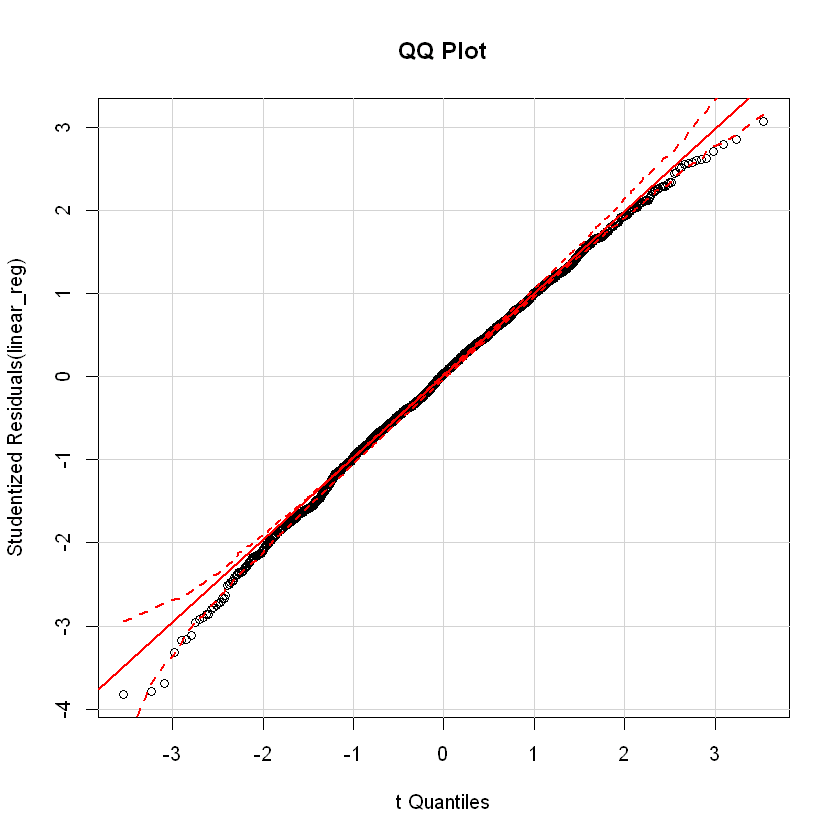

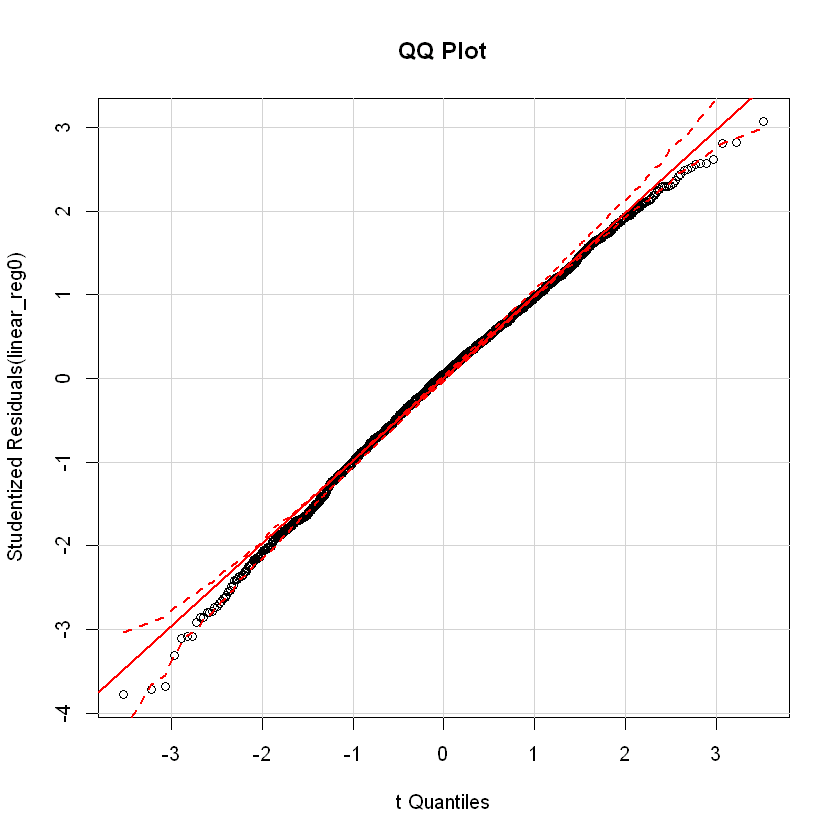

In [11]:
require(car,quietly=TRUE)
qqPlot(linear_reg, main="QQ Plot") #qq plot for studentized resid 
qqPlot(linear_reg0, main="QQ Plot") #qq plot for studentized resid 


# Box-Cox Transformation

In [20]:
bcPower(1:5,2)
boxCox(linear_reg000, lambda = seq(-0.5, 0.5, by=0.1))

[1]  0.0  1.5  4.0  7.5 12.0

ERROR: Error in boxCox(linear_reg000, lambda = seq(-0.5, 0.5, by = 0.1)): object 'linear_reg000' not found


# Model 2 - predicting cited_peryear

In [1]:
# pred_numeric2 <- c("abstract_length" ,"page.count","title_length", "abstract_ratio" ,"no_references","no_authors"
#                   ,"numkeys", "cited_peryear_zero")
# pred_cat2     <- c("source.title")

# pred_data2    <- data[,c(pred_numeric2,pred_cat2)]

# linear_reg2 <- lm(log(cited_peryear_zero) ~ ., data=pred_data2)
# summary(linear_reg2)

In [14]:
# linear_reg_step2 <- step(linear_reg2)
# linear_reg_step2

# Model3 - predicting cited_peryear_cat

In [13]:
# pred_numeric3 <- c("abstract_length" ,"page.count", "title_length" , "abstract_ratio" ,"no_references","no_authors",
#                    "numkeys")
# pred_cat3     <- c("source.title","cited_peryear_cat")

# pred_data3 <- data[,c(pred_numeric3,pred_cat3)]
# logistic3 <- glm(cited_peryear_cat ~ ., family=binomial(link='logit'),data=pred_data3)
# summary(logistic3)

# Multi-Collinearity

In [23]:
require(car,quietly=TRUE)
# Evaluate Collinearity

vif(linear_reg) # variance inflation factors 
# ??vif
sqrt(vif(linear_reg)) > 2 # problem?
##---------------------------------------------
vif(linear_reg2) # variance inflation factors 
# ??vif
sqrt(vif(linear_reg)) > 2 # problem?

abstract_length      page.count    title_length  abstract_ratio   no_references 
       1.111437        1.284690        1.070754        1.276337        2.218220 
     no_authors         numkeys     article_age    source.title 
       1.075444        1.113494        1.556907        2.253688

abstract_length      page.count    title_length  abstract_ratio   no_references 
          FALSE           FALSE           FALSE           FALSE           FALSE 
     no_authors         numkeys     article_age    source.title 
          FALSE           FALSE           FALSE           FALSE

abstract_length      page.count    title_length  abstract_ratio   no_references 
       1.078911        1.050830        1.051526        1.273948        1.825913 
     no_authors         numkeys    source.title 
       1.054543        1.112286        2.001343

abstract_length      page.count    title_length  abstract_ratio   no_references 
          FALSE           FALSE           FALSE           FALSE           FALSE 
     no_authors         numkeys     article_age    source.title 
          FALSE           FALSE           FALSE           FALSE

In [24]:
confint(linear_reg)
confint(linear_reg2)

,2.5 %,97.5 %
(Intercept),-29.62181,-10.56558
abstract_length,-0.04850754,0.00531413
page.count,0.1711162,0.9559056
title_length,-0.4994959,0.1905774
abstract_ratio,25.23705,144.23139
no_references,0.05223696,0.21216736
no_authors,-1.167432,0.733121
numkeys,-0.6086713,1.7740303
article_age,2.705681,3.773041
source.titlecomputers and education,13.63812,24.34025


,2.5 %,97.5 %
(Intercept),-0.6995944,1.8189091
abstract_length,-0.0082046556,-0.0008581487
page.count,-0.0112961,0.0870356
title_length,-0.08170295,0.01303712
abstract_ratio,0.6229348,17.0929027
no_references,0.01208615,0.03218828
no_authors,-0.1400777,0.1206527
numkeys,-0.0738701,0.2560489
source.titlecomputers and education,2.681361,4.078556


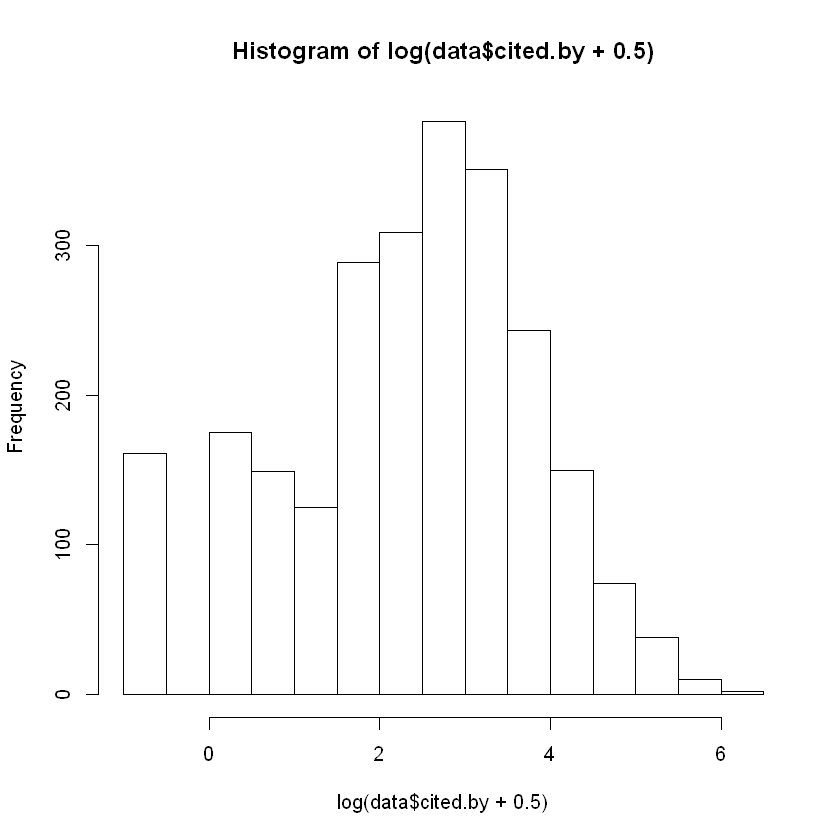

In [5]:
hist(log(data$cited.by+0.5))

In [1]:
save.image()